# Escuela Politécnica Nacional 
## Métodos Numéricos

**Nombre:** Lenin Amangandi

**Tema:** Mínimos cuadrados

[Link al repositorio Taller N5](https://github.com/Lenin27Amangandi/Workspace-Metodos-Numericos-2k25A-/tree/main/Talleres/TallerN5)

## A)  Interpole los puntos:

$p_1 = (5.4, 3.2)$

$p2_i = (9.5, 0.7)$

$p3 = (12.3, -3.6)$

De estos, el punto $p2_i$ debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos. 

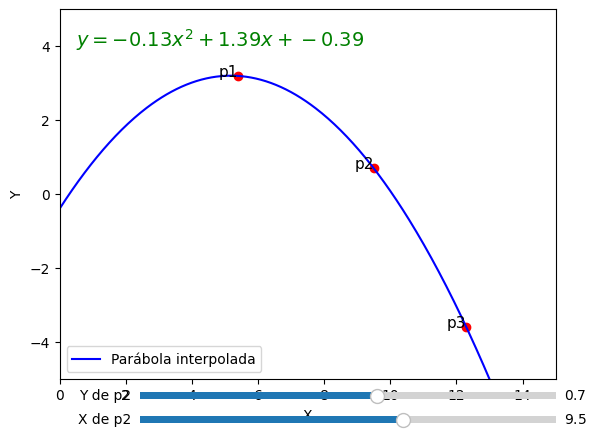

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Definir los puntos iniciales
p1 = (5.4, 3.2)
p2 = (9.5, 0.7)
p3 = (12.3, -3.6)

# Función para calcular la parábola que pasa por tres puntos
def interpolar_parabola(p1, p2, p3):
    # Tres puntos (x1, y1), (x2, y2), (x3, y3)
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3

    # Resolver el sistema de ecuaciones para los coeficientes a, b, c de la parábola
    A = np.array([[x1**2, x1, 1],
                  [x2**2, x2, 1],
                  [x3**2, x3, 1]])
    B = np.array([y1, y2, y3])

    # Resolver el sistema lineal
    a, b, c = np.linalg.solve(A, B)
    return a, b, c

# Función para graficar la parábola y los puntos
def graficar(a, b, c, p1, p2, p3):
    # Crear un rango de valores x para dibujar la parábola
    x_vals = np.linspace(0, 15, 400)
    y_vals = a * x_vals**2 + b * x_vals + c

    # Graficar la parábola
    ax.cla()
    ax.plot(x_vals, y_vals, label="Parábola interpolada", color="blue")
    
    # Graficar los puntos
    ax.scatter([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]], color="red")
    ax.text(p1[0], p1[1], 'p1', fontsize=11, ha='right')
    ax.text(p2[0], p2[1], 'p2', fontsize=11, ha='right')
    ax.text(p3[0], p3[1], 'p3', fontsize=11, ha='right')

    # Etiquetas de la ecuación (sin caracteres de escape innecesarios)
    equation_text = r'$y = %.2fx^2 + %.2fx + %.2f$' % (a, b, c)
    ax.text(0.5, 4, equation_text, fontsize=14, color='green')

    ax.set_xlim(0, 15)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    
    # Redibujar el gráfico
    fig.canvas.draw()

# Función para actualizar la parábola cuando se mueve p2
def actualizar(val):
    global p2
    p2 = (slider_x.val, slider_y.val)
    a, b, c = interpolar_parabola(p1, p2, p3)
    graficar(a, b, c, p1, p2, p3)

fig, ax = plt.subplots()

a, b, c = interpolar_parabola(p1, p2, p3)
graficar(a, b, c, p1, p2, p3)

ax_slider_x = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_slider_y = plt.axes([0.25, 0.06, 0.65, 0.03], facecolor='lightgoldenrodyellow')

slider_x = Slider(ax_slider_x, 'X de p2', 0, 15, valinit=p2[0], valstep=0.1)
slider_y = Slider(ax_slider_y, 'Y de p2', -5, 5, valinit=p2[1], valstep=0.1)

slider_x.on_changed(actualizar)
slider_y.on_changed(actualizar)

plt.show()


## B) Interpole el siguiente conjunto de datos:
xs = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]